In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # shape: (150, 4)
y = iris.target  # 3 classes: 0, 1, 2

# Train/test split and normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using the Sci-kit learn MLP Classifier function

In [3]:
# Define and fit the model
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=42)
clf.fit(X_train, y_train)

/home/anna/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

In [4]:
# Evaluate performance
print("Training accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

Training accuracy: 0.9642857142857143
Test accuracy: 0.9473684210526315


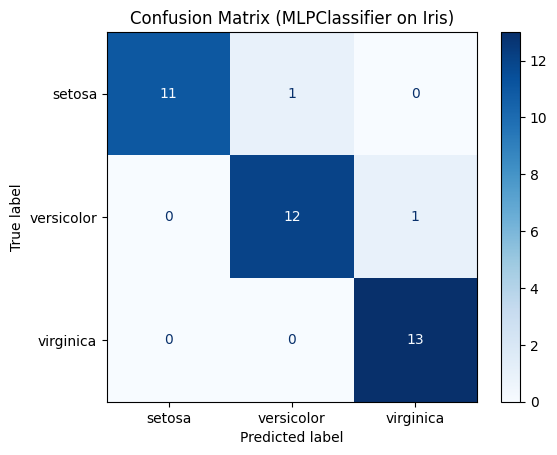

In [5]:
# Plot confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (MLPClassifier on Iris)")
plt.show()

# Building a one-layer MLP from scratch

In [6]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [7]:
# Define a one-layer MLP model
class IrisMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 10),  # 4 input features
            nn.ReLU(),
            nn.Linear(10, 3)   # 3 output classes
        )

    def forward(self, x):
        return self.net(x)

model = IrisMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
# Train the model
for epoch in range(200):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        acc = (outputs.argmax(1) == y_train).float().mean()
        print(f"Epoch {epoch} - Loss: {loss.item():.4f} - Accuracy: {acc.item():.4f}")

Epoch 0 - Loss: 1.0154 - Accuracy: 0.6071
Epoch 50 - Loss: 0.2582 - Accuracy: 0.9196
Epoch 100 - Loss: 0.1028 - Accuracy: 0.9732
Epoch 150 - Loss: 0.0598 - Accuracy: 0.9821


In [9]:
# Evaluate on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test).argmax(dim=1).numpy()

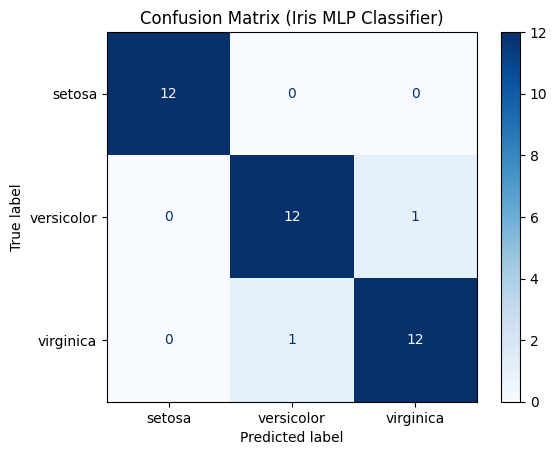

In [10]:
# Plot confusion matrix
cm = confusion_matrix(y_test.numpy(), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Iris MLP Classifier)")
plt.show()